# K-means 군집화

- 나누고자 하는 클러스터의 갯수를 설정, 그 갯수만큼 임의의 초기점 생성
- initial point를 군집중심점으로 생각하고 군집 구분 실시
- 군집별로 새로운 군집중심점을 계산
- 새로운 군집중심점을 기준으로 군집 구분 실시
- 3-4번 과정을 반복(더 이상 군집 구분의 변화가 없을 때까지)

## 장단점
- 장점
    - 적용이 쉽고 간단하다
   
- 단점
    - 군집의 갯수 k는 사전에 설정하여야 한다
    - 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용한다

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mglearn
from matplotlib import rc


# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

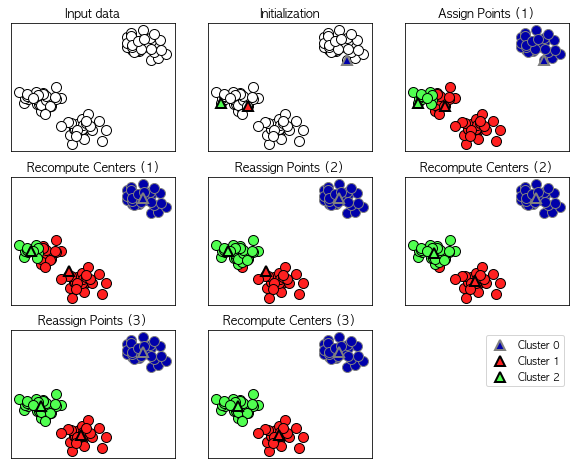

In [2]:
# kmeans 알고리즘에 대한 설명 그래프
mglearn.plots.plot_kmeans_algorithm()

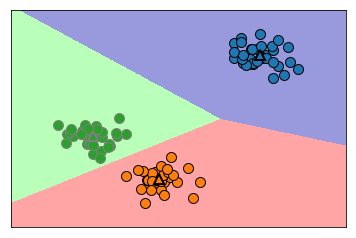

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# 인위적으로 2차원 데이터 생성
X, y = make_blobs(random_state = 1)

# 군집 모델 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# 데이터의 결과값(종속변수의 값)
lbl = kmeans.labels_
print(lbl)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [6]:
# 예측한 값
pre = kmeans.predict(X)
print(pre)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [7]:
# 정확도
print(len(pre==lbl) / len(lbl))

1.0


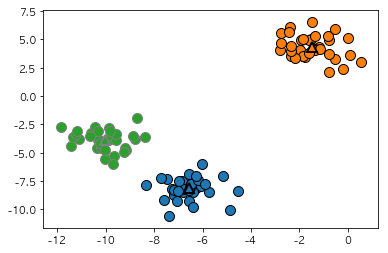

In [8]:
# 3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
[0, 1, 2],
markers='^', markeredgewidth=2)

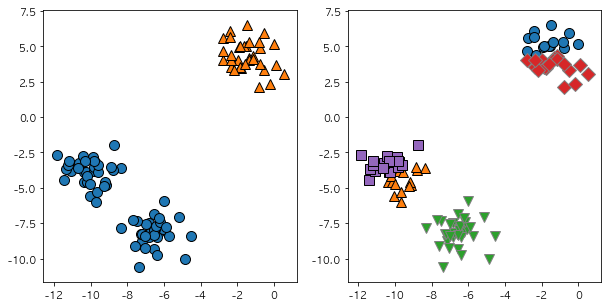

In [9]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라
# 클러스터링 결과가 달라질 수 있음
# 1행 2열의 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 2, 5개의 클러스터로 나눌 경우
idx = 0
for k in [2, 5]:
    # n_clusters 클러스터의 갯수
    kmeans = KMeans(n_clusters=k)
    # 모델 학습
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[idx])
    idx += 1

In [10]:
# 붓꽃 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
# 0~4행 출력
print(iris.data[0:5])
# 변수명 출력
print(iris.feature_names)
# 품종 레이블 출력
print(iris.target[0:5])
# 품종 이름 출력
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [12]:
# 붓꽃 데이터를 데이터프레임으로 변환
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [13]:
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

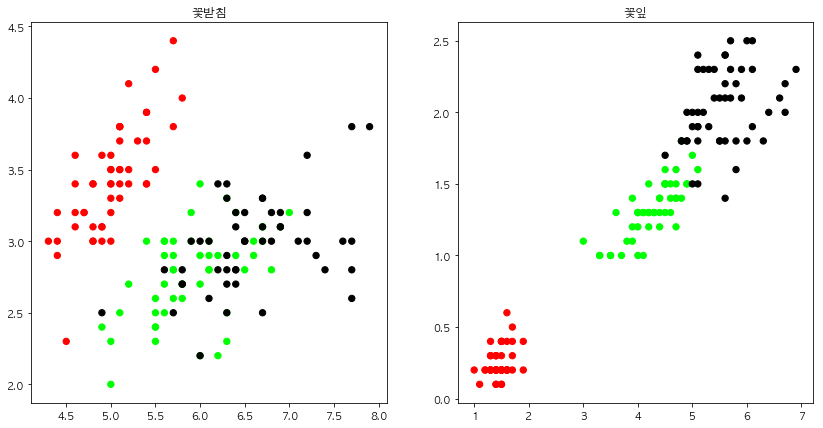

In [15]:
# 그래프 사이즈
plt.figure(figsize=(14, 7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 꽃받침 기준 그래프(클러스터링이 어려운 상태)
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title("꽃받침")
# 꽃잎 기준 그래프(클러스터링이 잘 되어 있음)
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title("꽃잎")

In [16]:
# K-Means Cluster 모델 생성(클러스터 3개)
model = KMeans(n_clusters=3)
# 비지도학습이므로 답을 제외한 데이터만으로 학습 실시
print(x.head())
model.fit(x)

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
# clustering을 한 결과(컴퓨터가 분류한 결과값)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Text(0.5, 1.0, '클러스터링 결과')

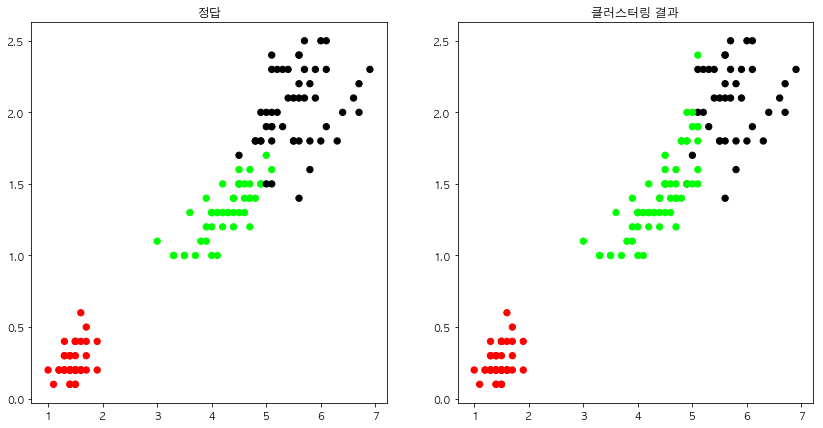

In [18]:
# 그래프 사이즈
plt.figure(figsize=(14, 7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title("정답")
# 그래프 출력(정답)
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title("클러스터링 결과")

In [19]:
# label 순번 변경
# [0, 1, 2]에서 [1, 0, 2]로 변경 (0과 1을 서로 바꿈)
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0.5, 1.0, '클러스터링 결과')

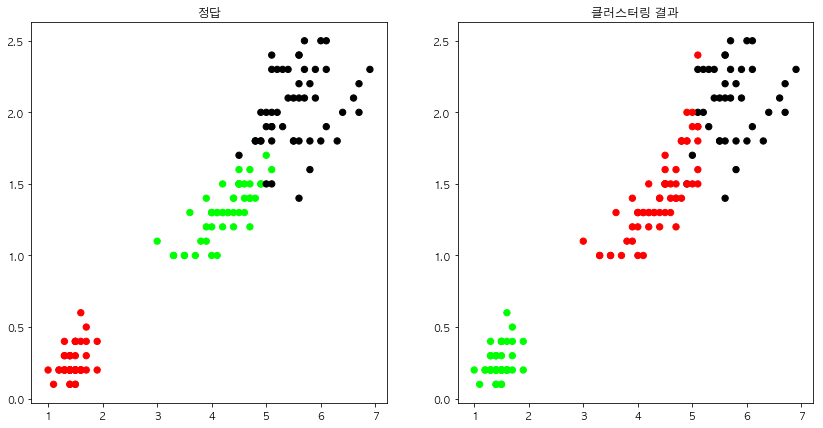

In [20]:
# 그래프 사이즈
plt.figure(figsize=(14, 7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title("정답")
# 그래프 출력(정답)
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title("클러스터링 결과")

In [21]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, predY)

0.24

In [22]:
# 분류결과표 출력
sm.confusion_matrix(y, predY)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

# KNN 알고리즘(K-means와 다르므로 주의)

- k-최근접 이웃 알고리즘(k-NN, k-Nearest Neighbor) - 분류 알고리즘
- 지도학습(Supervised Learning)
- 분류 방법 : 같은 값이라도 k(최근접 이웃)의 갯수에 따라 분류 결과가 달라진다.

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


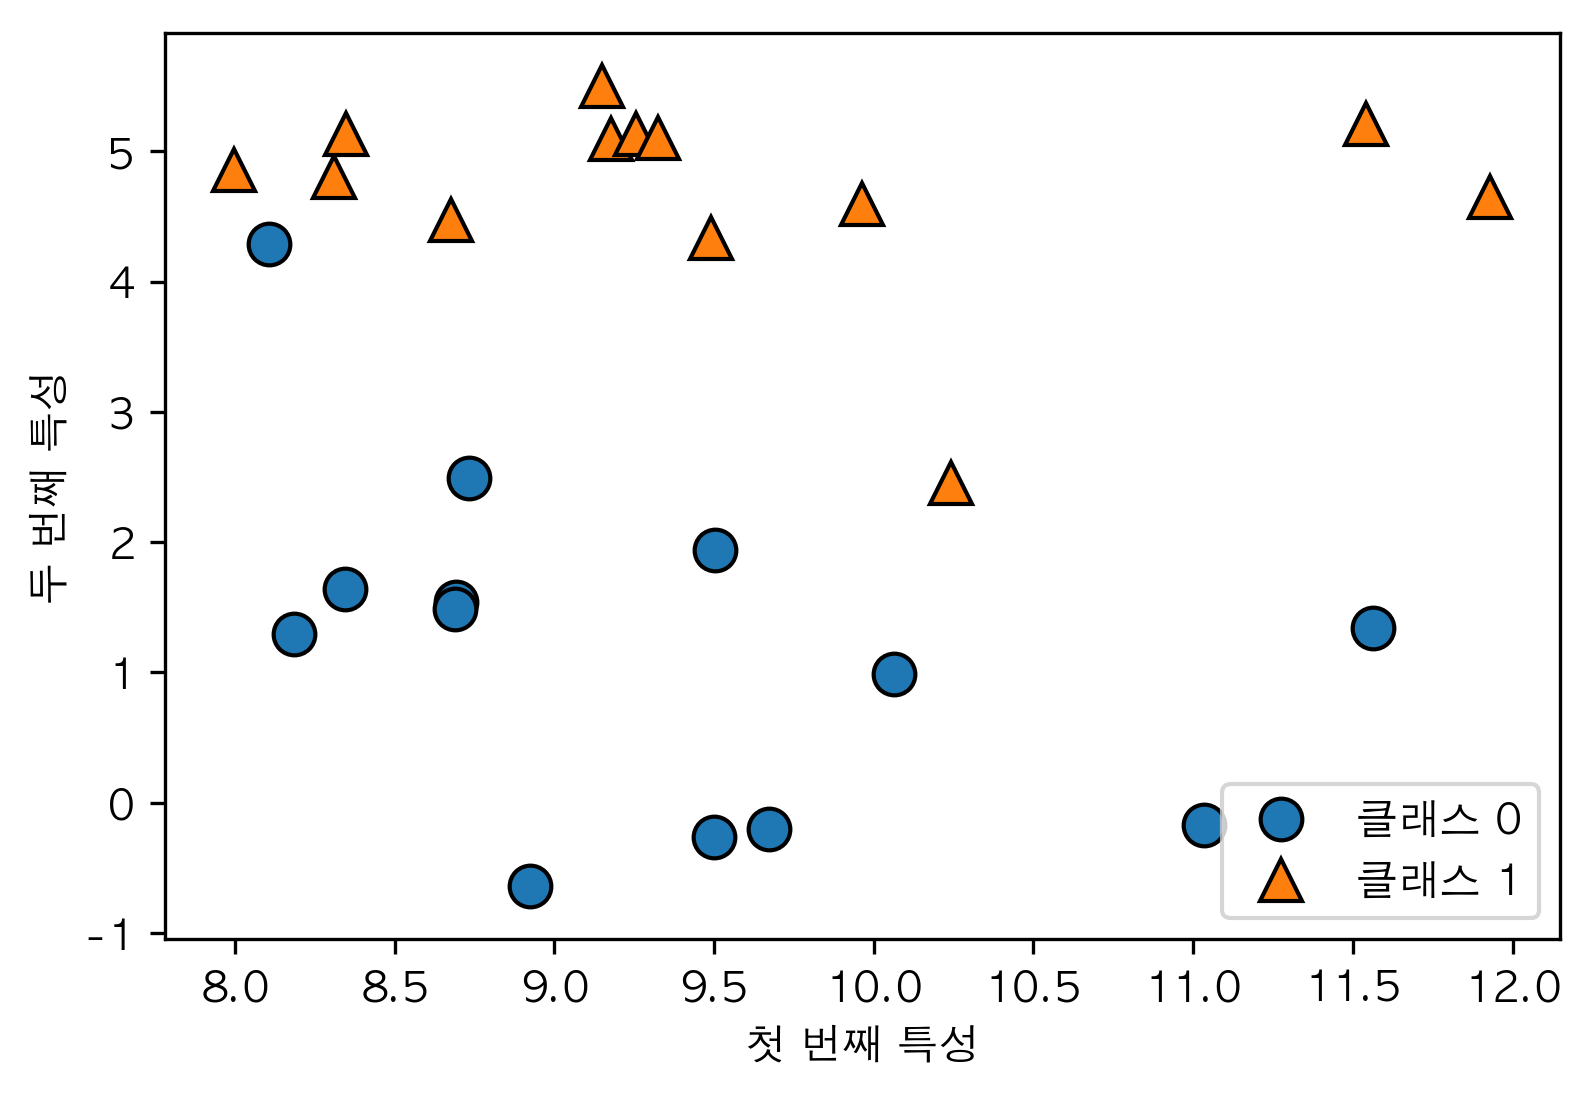

In [23]:
plt.rcParams['figure.dpi'] = 300
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()
# 산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
# 데이터포인트 26개와 특성 2개
print("X.shape: {}".format(X.shape))

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


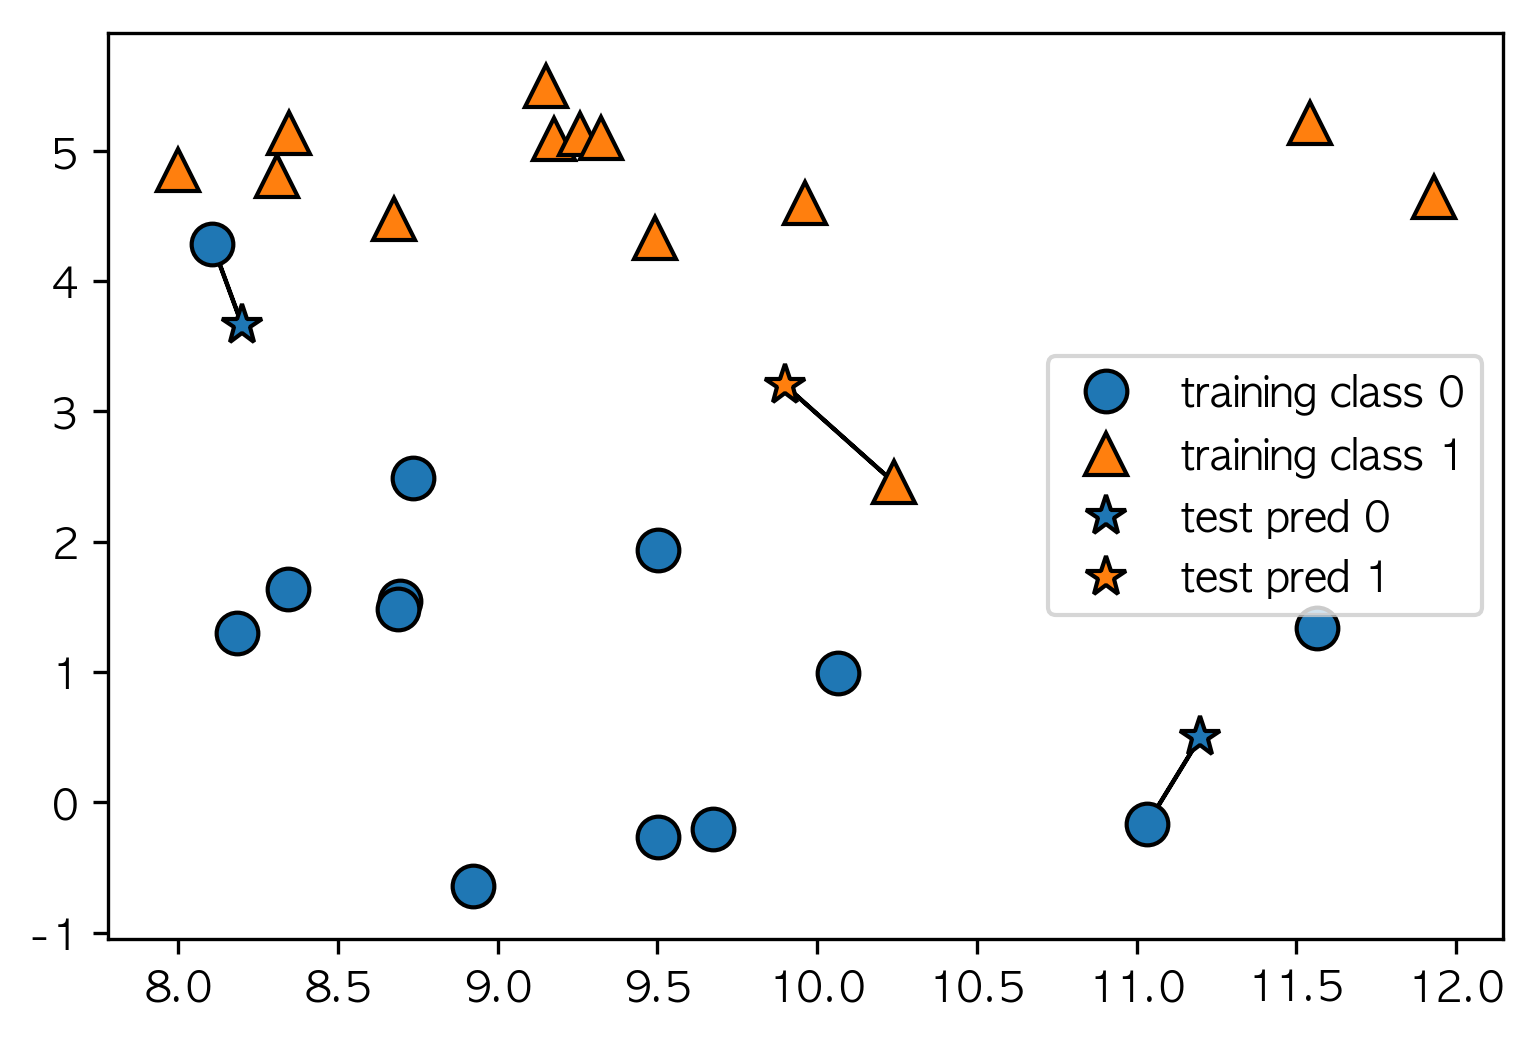

In [24]:
# 최근접이웃(가장 가까운 이웃)의 수가 1일 때
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


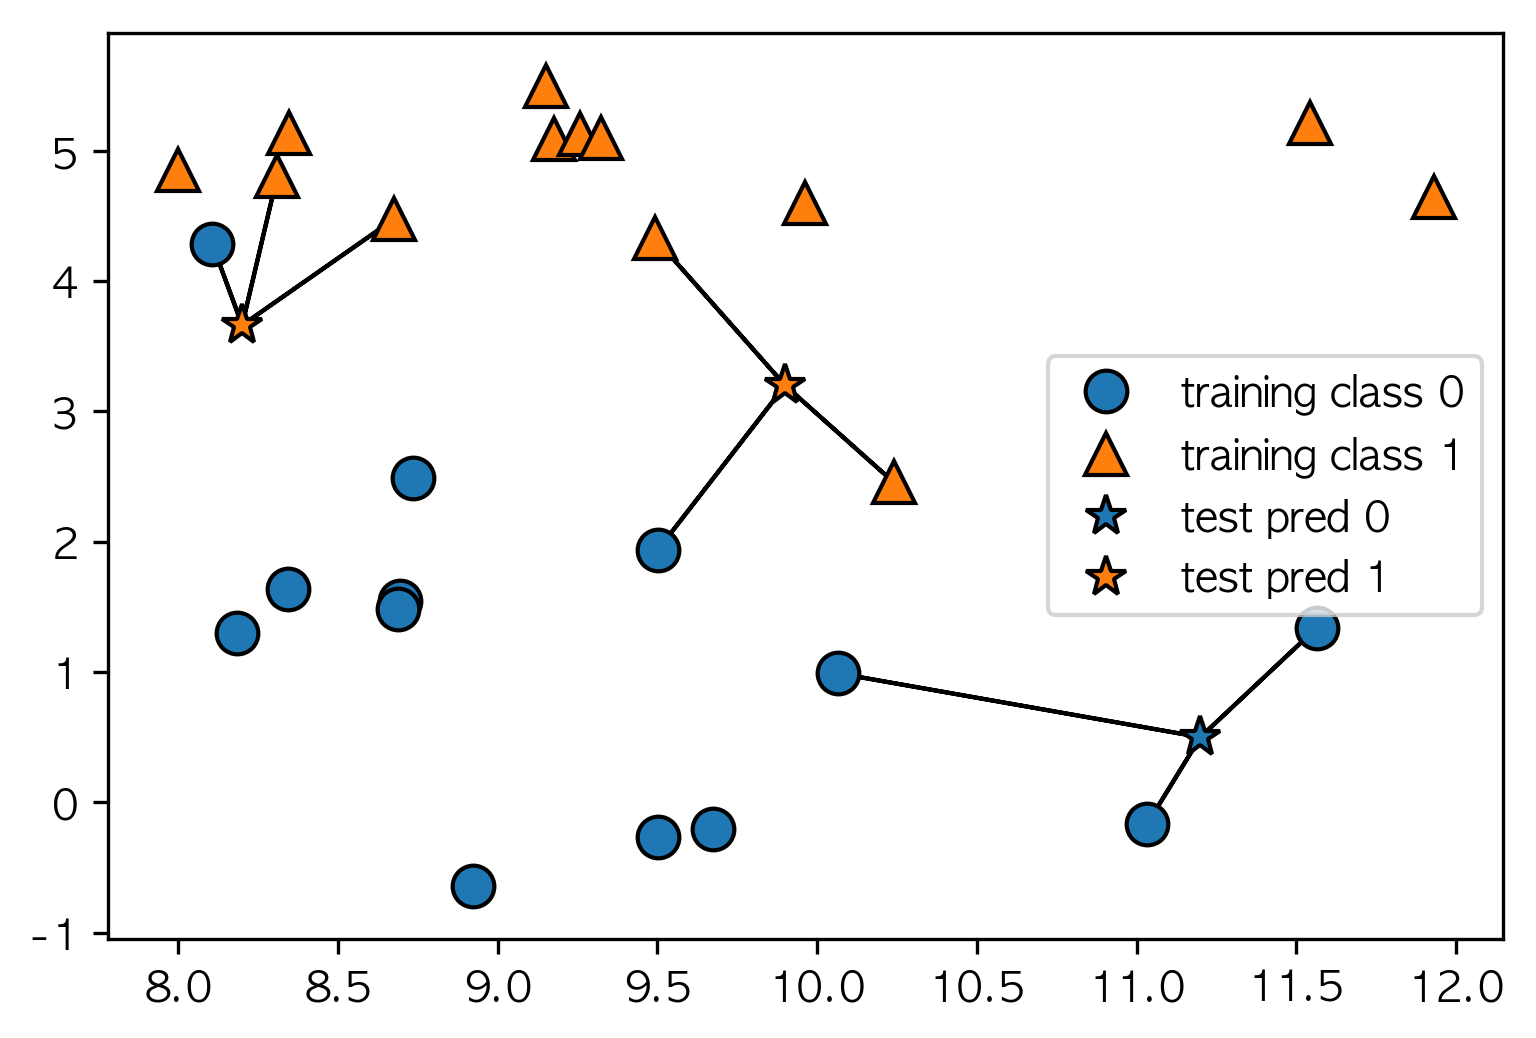

In [25]:
# 최근접이웃(가장 가까운 이웃)의 수가 3일 때
mglearn.plots.plot_knn_classification(n_neighbors=3)

/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


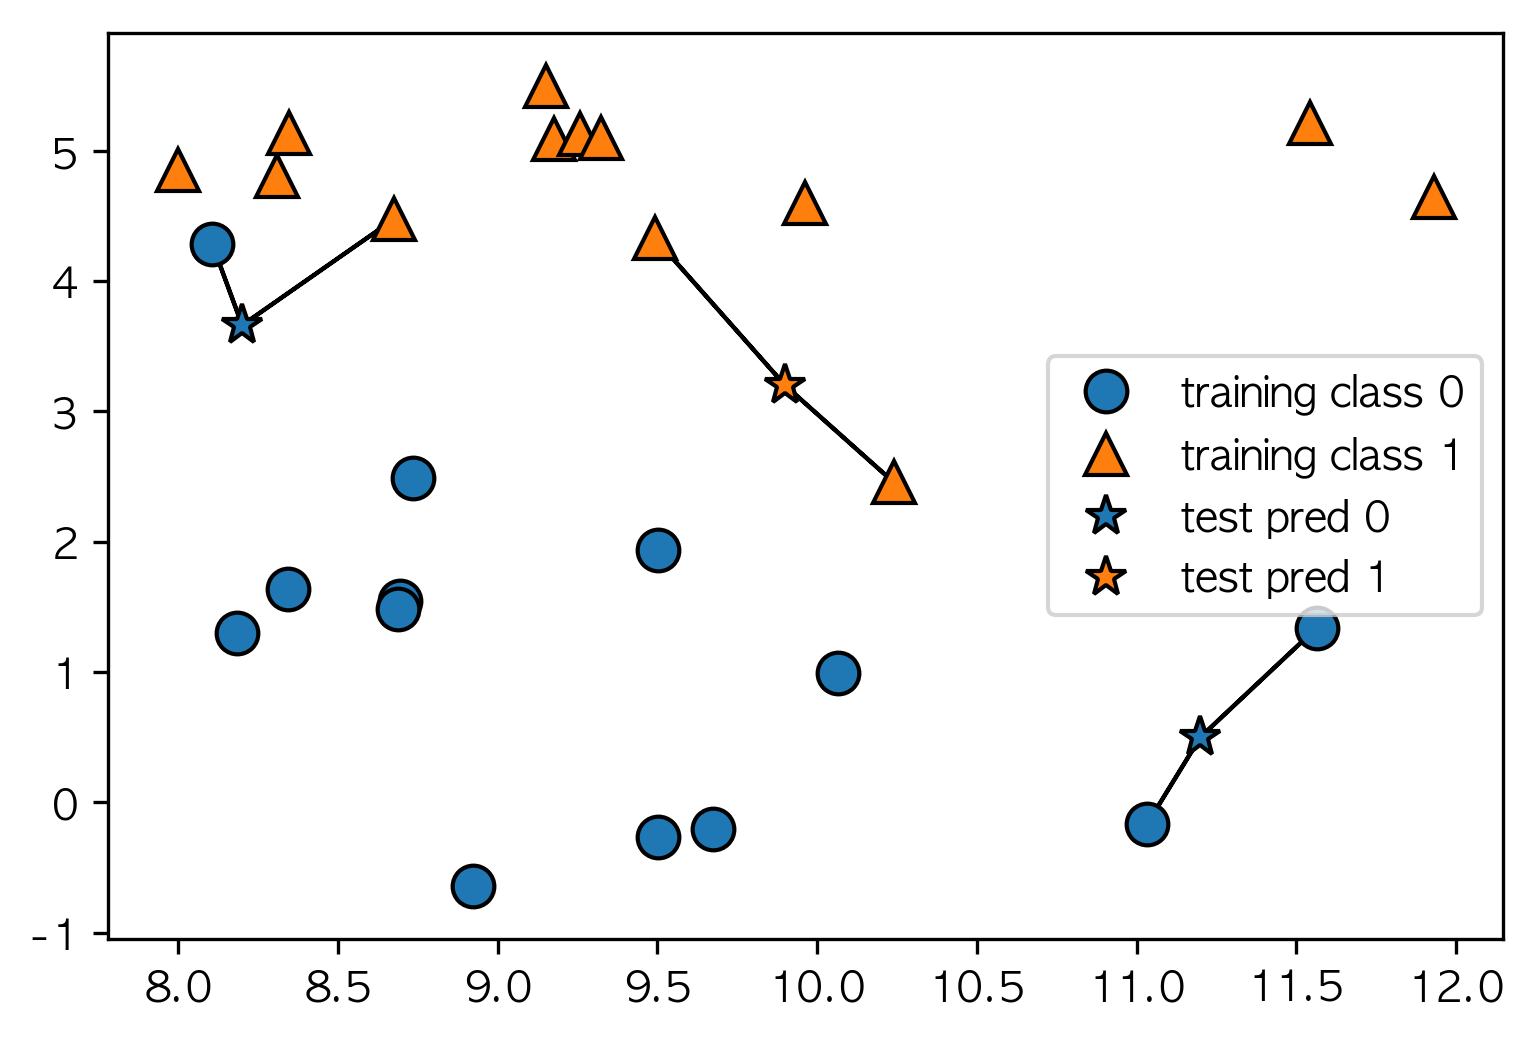

In [26]:
# 최근접이웃(가장 가까운 이웃)의 수가 2일 때
mglearn.plots.plot_knn_classification(n_neighbors=2)

In [27]:
# 데이터셋 생성 및 분리
X, y = mglearn.datasets.make_forge()
print(len(X), len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

26 26


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
# 3개의 이웃
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [29]:
# 데이터 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [30]:
predY = clf.predict(X_test)
print("검증용 데이터 값: {}".format(y_test))
print("검증용 데이터 예측: {}".format(predY))

검증용 데이터 값: [1 0 1 0 1 1]
검증용 데이터 예측: [1 0 1 0 1 0]


In [31]:
print("검증용 데이터셋 정확도: {:.2f}".format(clf.score(X_test, y_test)))

검증용 데이터셋 정확도: 0.83


In [32]:
import sklearn.metrics as sm
sm.confusion_matrix(y_test, predY)

array([[2, 0],
       [1, 3]])

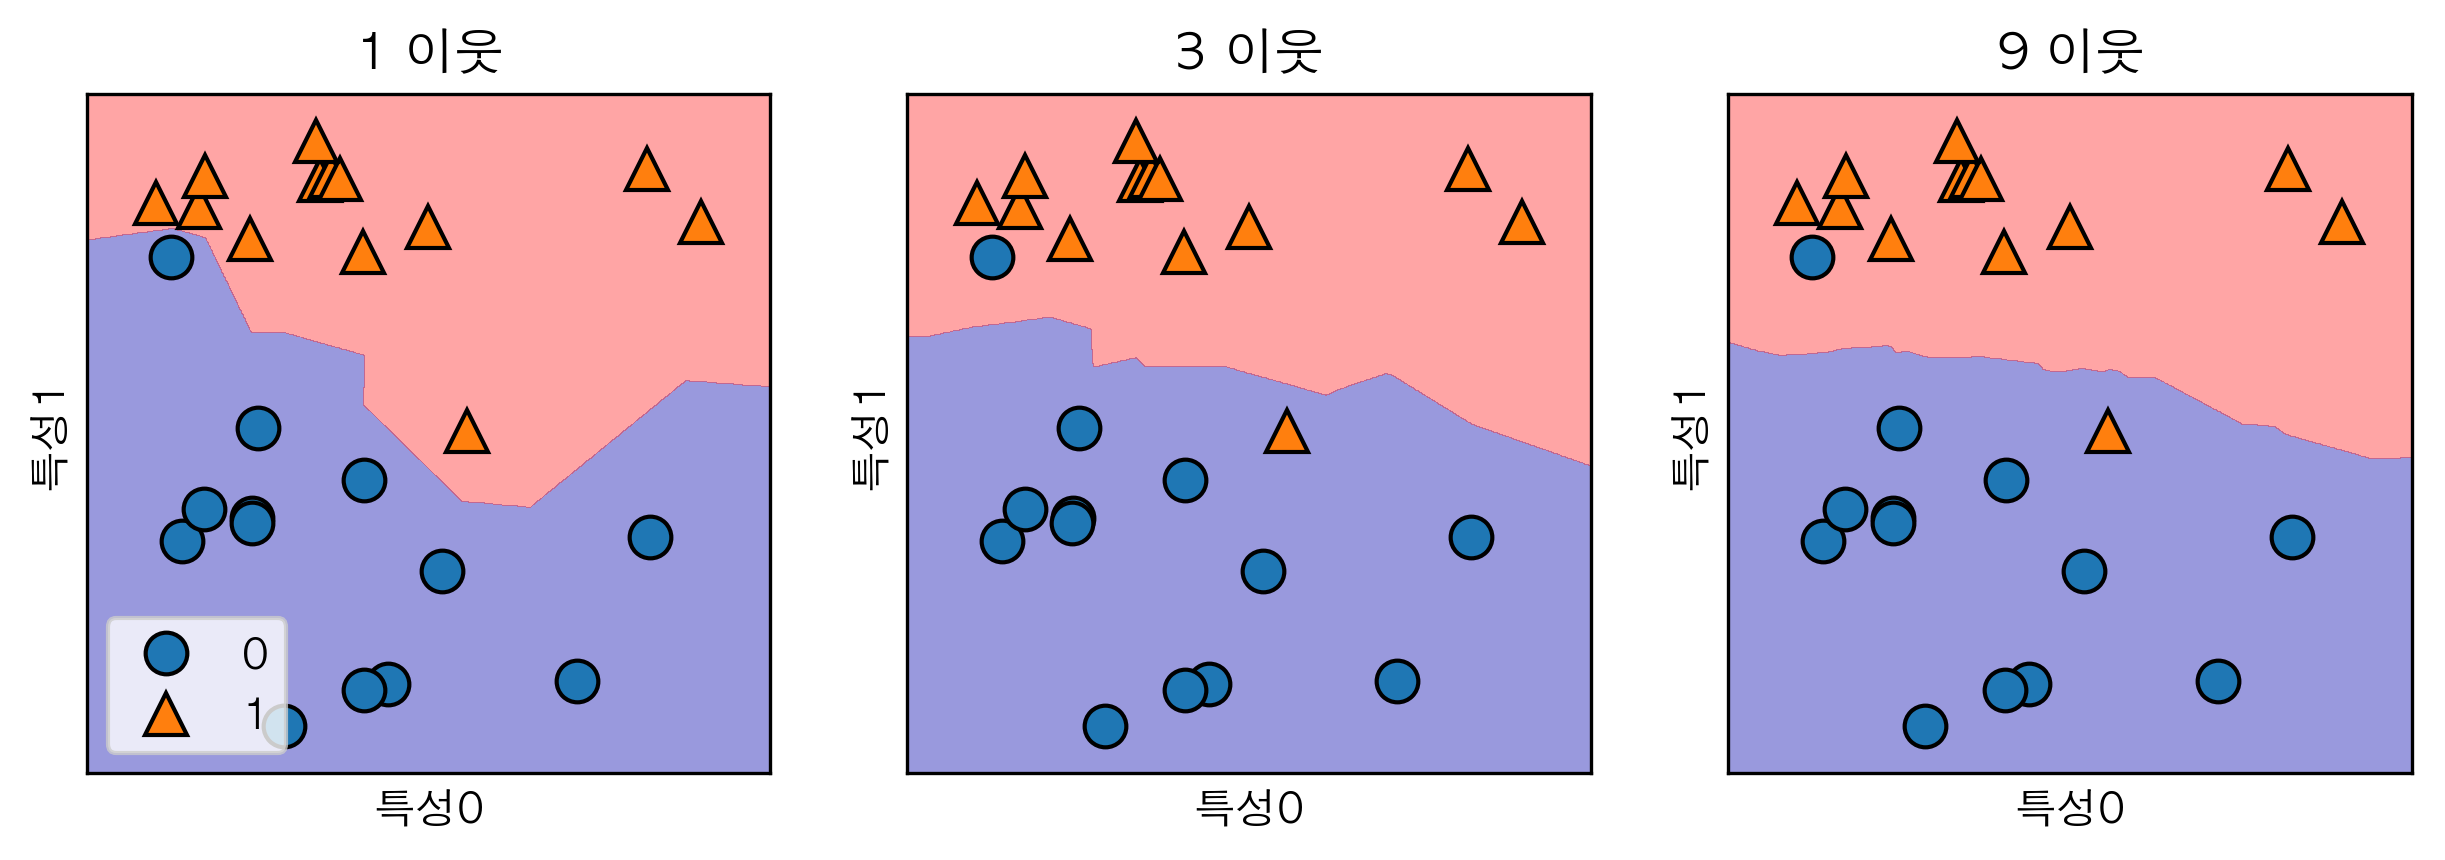

In [33]:
# 1행 3열의 서브플롯
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{0} 이웃".format(n))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
axes[0].legend(loc=3)
# k = 1 : 훈련 데이터에 가깝게 따라감
# 이웃의 수를 늘릴수록 결정경계는 더 부드러워짐
# 이웃을 적게 사용하면 모델의 복잡도가 높아지고
# 많이 사용하면 복잡도는 낮아진다.

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [35]:
# 569개의 데이터, 특성 30개
print("데이터의 형태: {}".format(cancer.data.shape))

데이터의 형태: (569, 30)


In [36]:
# 악성 212개, 양성 357개
print("클래스별 샘플 갯수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [37]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


[1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
[0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


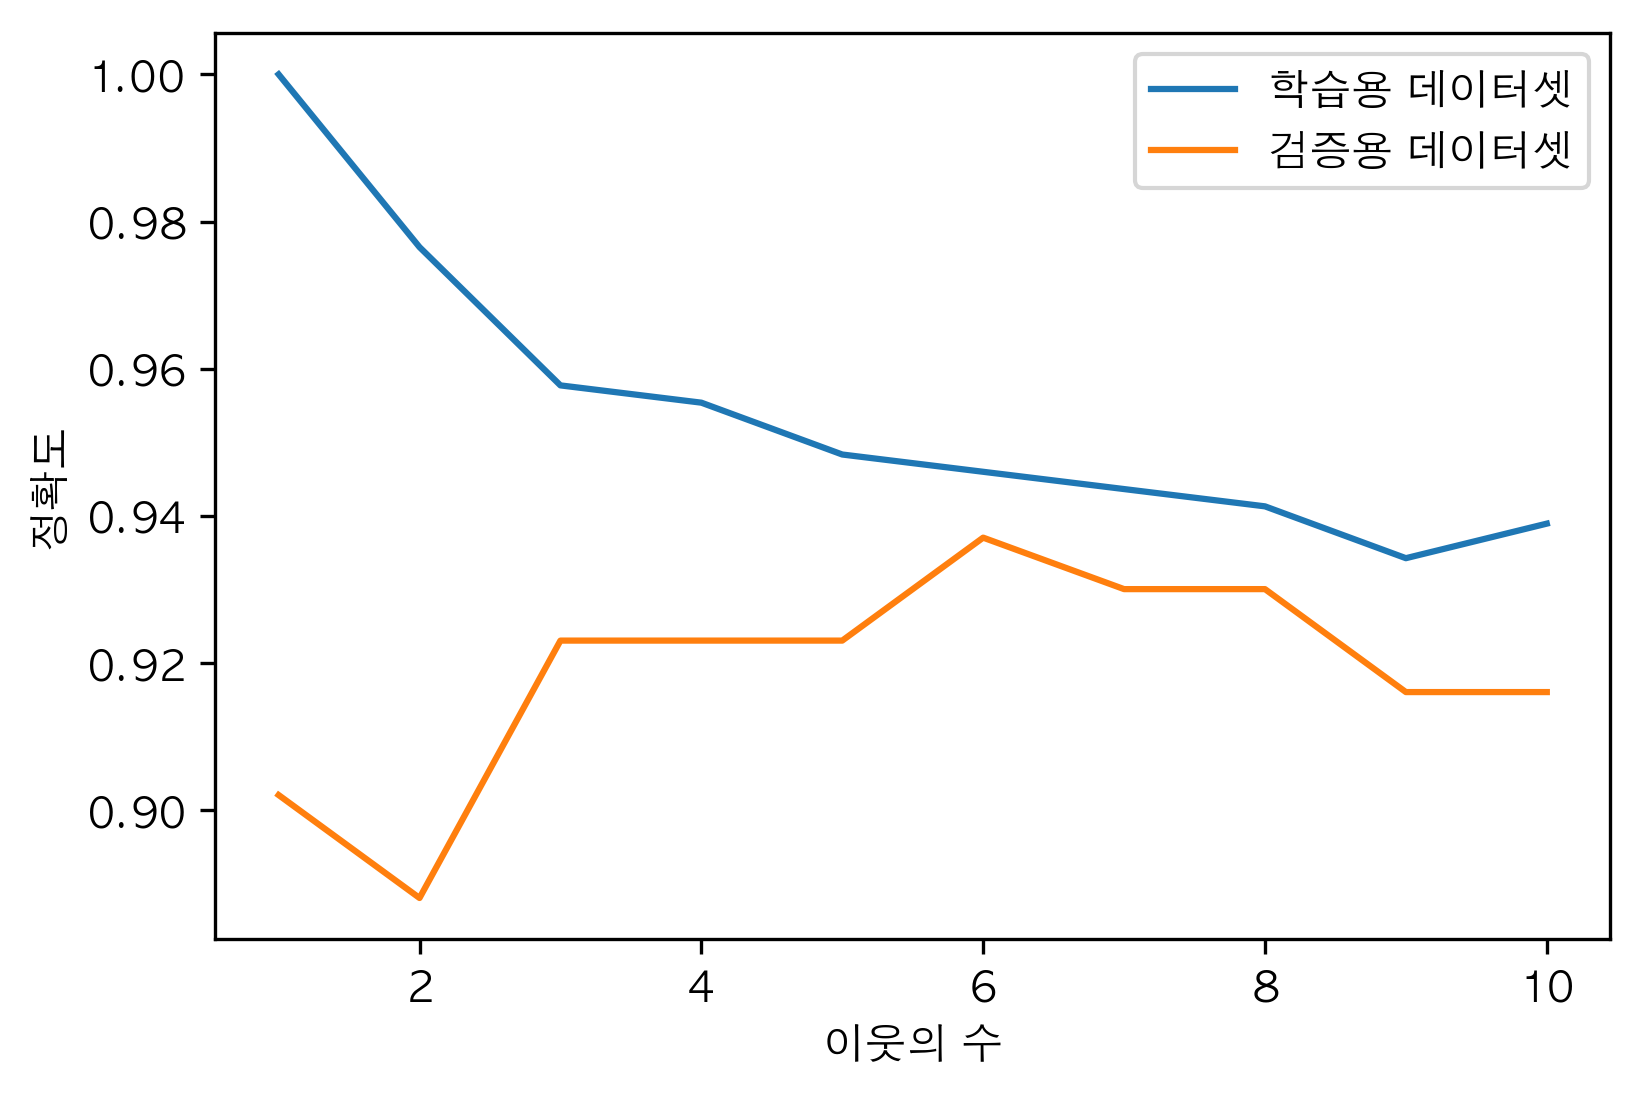

In [38]:
# 학습용 : 검증용 = 75 : 25
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 모델의 정확도를 저장하기 위한 리스트
train_rate = []
test_rate = []

# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)
    # 모델 학습
    clf.fit(X_train, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(clf.score(X_train, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(clf.score(X_test, y_test))
    
print(train_rate)
print(test_rate)
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.xlabel("이웃의 수")
plt.ylabel("정확도")
plt.legend()

In [39]:
from sklearn.datasets import load_iris
# 데이터 로딩
iris_dataset = load_iris()
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [40]:
print("iris_dataset의 keys: {}".format(iris_dataset.keys()))

iris_dataset의 keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [41]:
# 데이터셋에 대한 설명
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
# 우리가 예측하려는 붓꽃 품종의 이름
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [43]:
print("특성의 이름: {}".format(iris_dataset['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [44]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [45]:
# 데이터의 크기 : 150행 4열
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [46]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [47]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [48]:
# target 150개
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [49]:
print("target:\n{}".format(iris_dataset['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
# train_test_split() : 전체 데이터 중 75%를
# 학습용 데이터셋(X_train)으로 선택, 25%를 검증용 데이터셋으로 선택
# random_state = 0 유사 난수 생성기로 데이터셋을 무작위로 추출하게 됨
# 0은 난수 초기값, 난수 초기값을 고정시키면 항상 같은 결과가 나오게 됨
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [51]:
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (112, 4)
y_train 크기 : (112,)


In [52]:
print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

X_test 크기 : (38, 4)
y_test 크기 : (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122473cf8>,
      dtype=object)

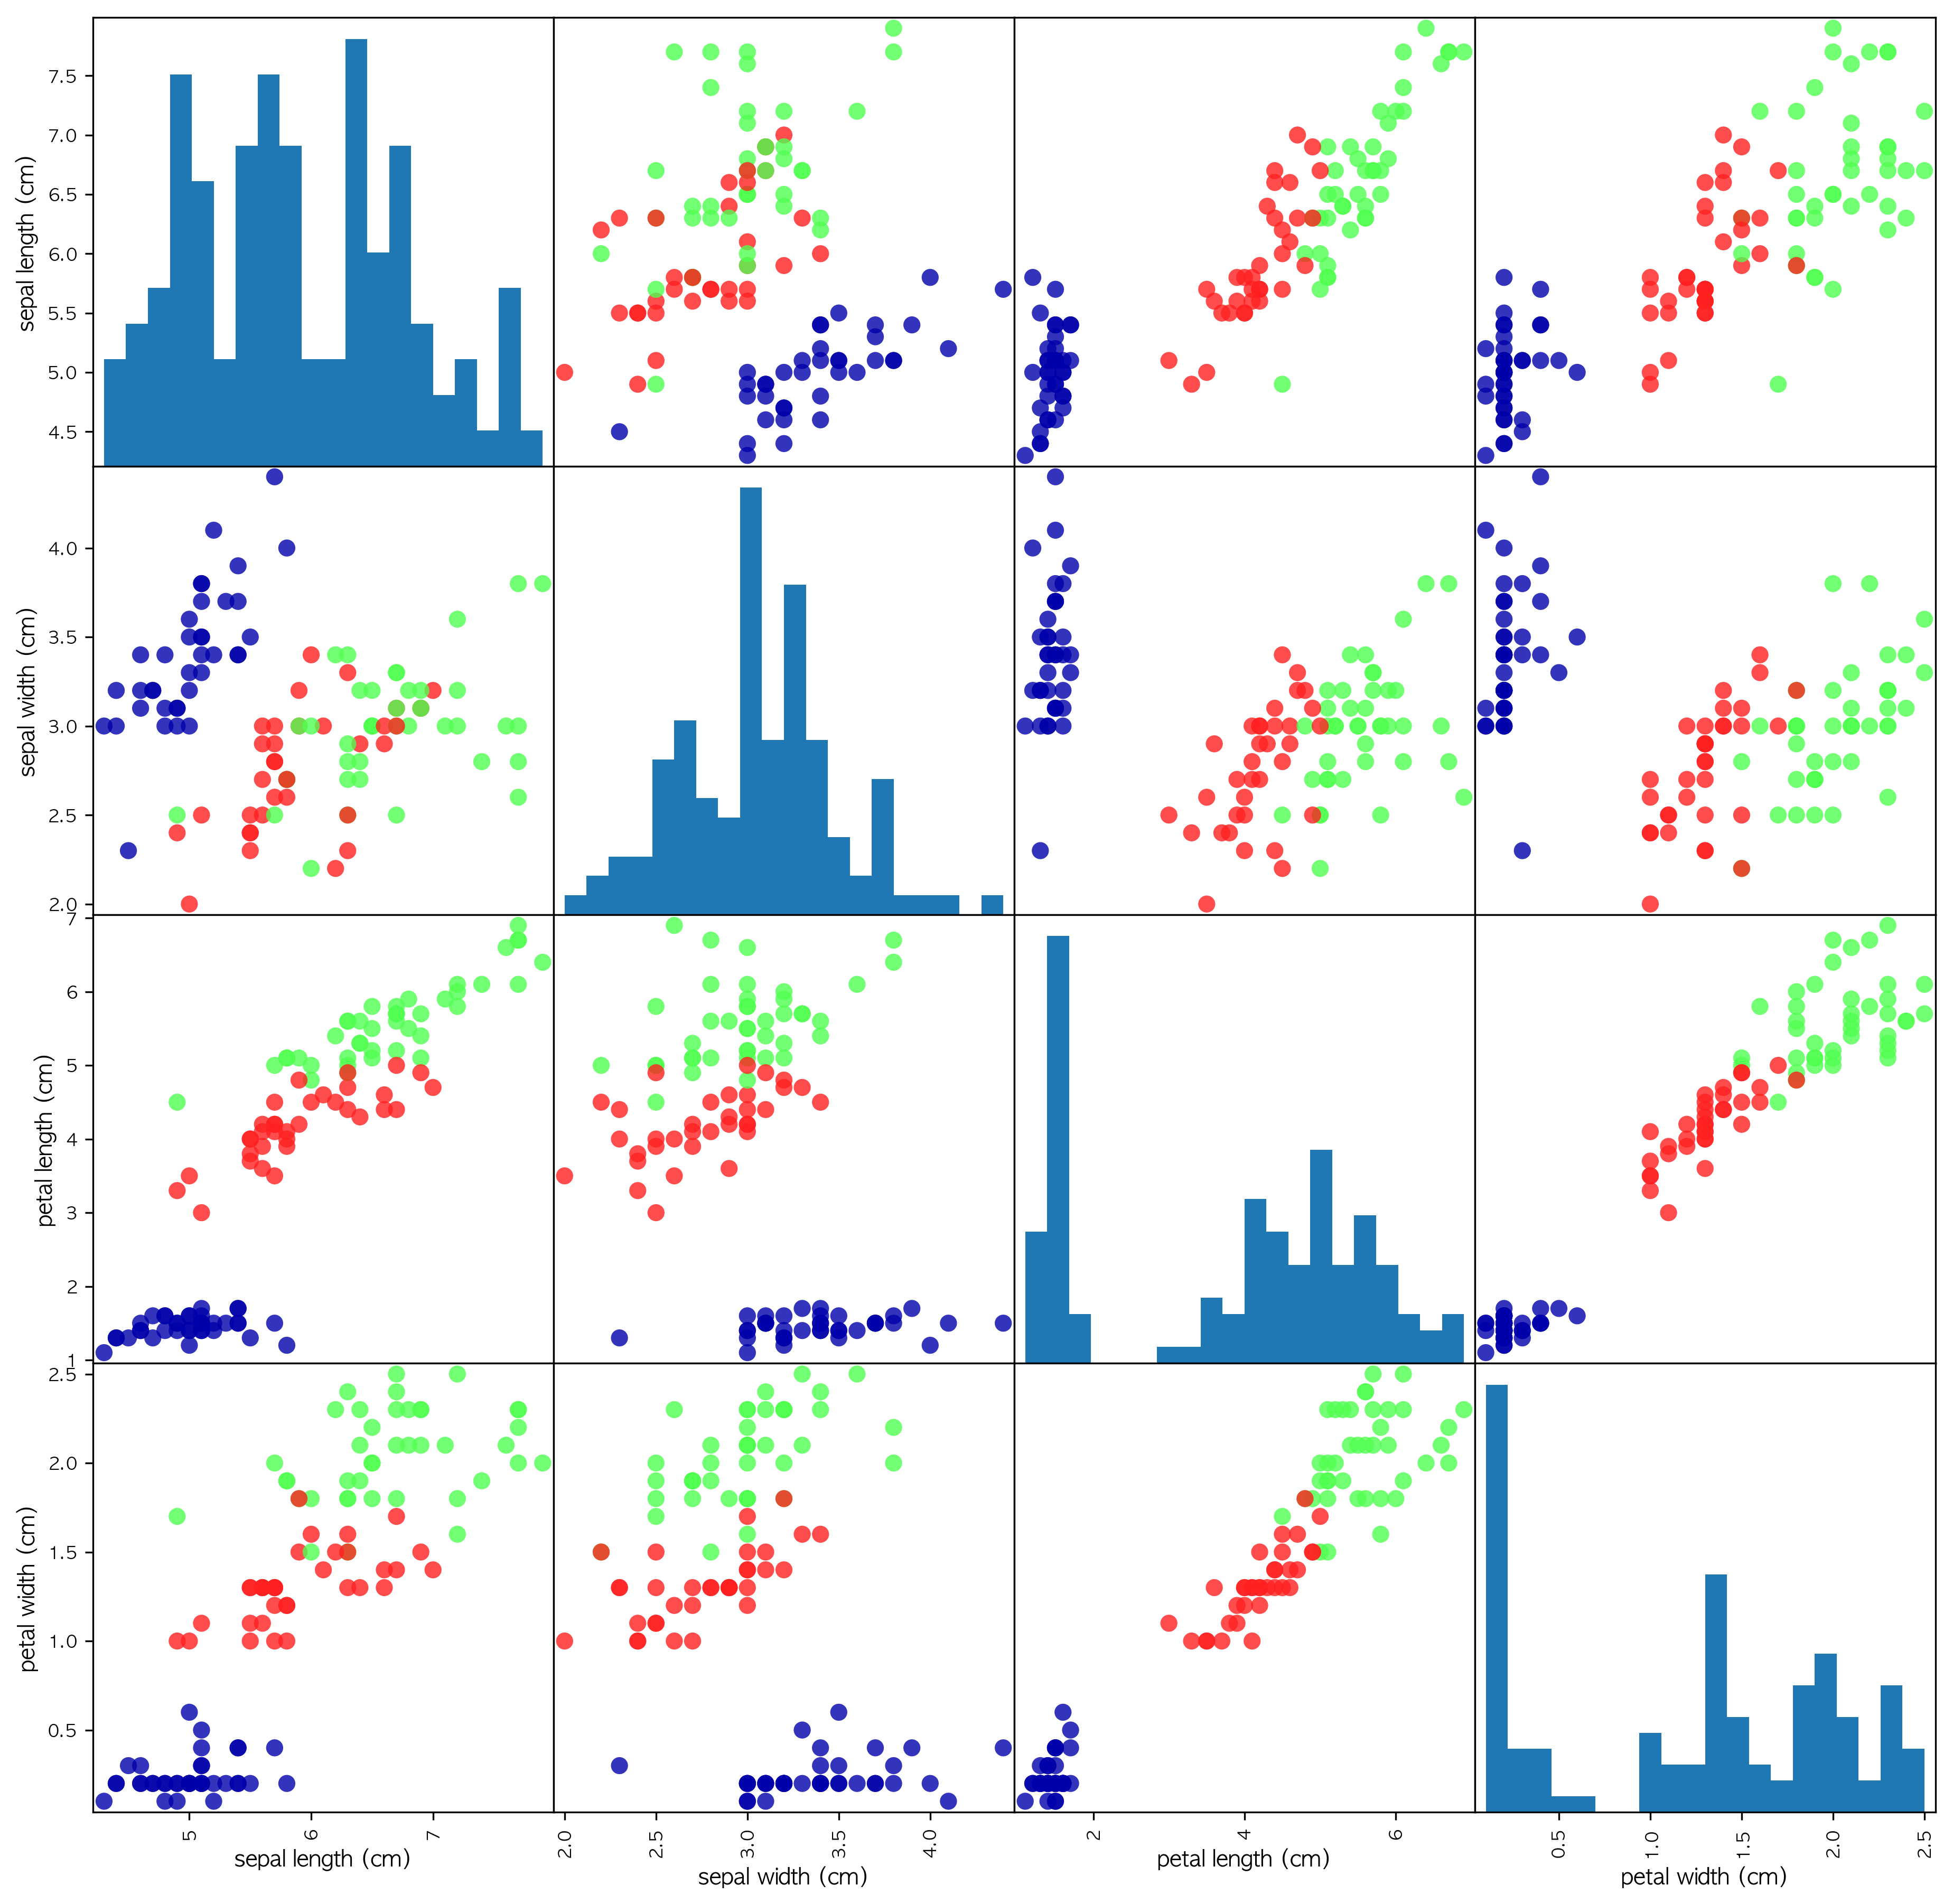

In [53]:
# 데이터를 살펴보기에 좋은 방법 : 시각화
# 산점도 : 데이터를 x, y축에 놓아 각 데이터 포인트를 하나의 점으로 나타내느 그래프
# 데이터프레임 생성
iris_dataframe = pd.DataFrame(X_train,
                             columns = iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬 출력
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                          marker='o', hist_kwds={'bins': 20}, s= 60, alpha=0.8, cmap=mglearn.cm3)

# 그래프를 보면 세 클래스가 비교적 잘 구분되고 있으므로 머신러닝하기에 적합한 데이터임

In [54]:
# k-최근접 이웃 알고리즘
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# 1개의 이웃만을 찾는다.
knn = KNeighborsClassifier(n_neighbors=1)

In [55]:
# 학습용 데이터셋으로부터 모델 생성
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [56]:
# 예측하기
# 꽃받침의 길이가 5cm, 폭 2.9cm, 꽃잎 길이 1cm, 폭 0.2cm인 붓꽃의 품종은?
X_new = np.array([[5, 2.9, 1, 0.2]])
print("입력 데이터: {}".format(X_new.shape))
prediction = knn.predict(X_new)
print("예측 결과: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
iris_dataset['target_names'][prediction]))

입력 데이터: (1, 4)
예측 결과: [0]
예측한 타깃의 이름: ['setosa']


In [57]:
# 모델 평가
y_pred = knn.predict(X_test)
print("검증용 데이터셋의 실제값:\n{}".format(y_test))
print("검증용 데이터셋에 대한 예측값:\n{}".format(y_pred))

검증용 데이터셋의 실제값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
검증용 데이터셋에 대한 예측값:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [58]:
# 정확도를 출력하는 방법(2가지 방법)
print("검증용 데이터셋의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
print("검증용 데이터셋의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

검증용 데이터셋의 정확도: 0.97
검증용 데이터셋의 정확도: 0.97
